# EUV

In [ ]:
import os
import drms
from datetime import datetime, timedelta

In [ ]:
jsoc_email = 'mgjeon@khu.ac.kr'
client = drms.Client(email=jsoc_email, verbose=True)

In [ ]:
year = 2017
month = 9
day = 6
hour = 8
minute = 36

start_time = datetime(year, month, day, hour, minute)
start_time

datetime.datetime(2017, 9, 6, 8, 36)

In [ ]:
noaa_nums = [12673]

ar_mapping = client.query('hmi.Mharp_720s[][%sZ]' % start_time.isoformat('_', timespec='seconds'),
                           key=['NOAA_AR', 'HARPNUM'])
ar_mapping

,NOAA_AR,HARPNUM
0,12673,7115
1,12674,7117
2,0,7118
3,12677,7122
4,12675,7123
5,0,7125
6,12678,7127
7,0,7128
8,0,7129


In [ ]:
nums = []

if len(ar_mapping) !=0:
    for noaa_num in noaa_nums:
        harpnum = ar_mapping[ar_mapping['NOAA_AR'] == int(noaa_num)]['HARPNUM']
        if len(harpnum) > 0:
            num_dict = {'NOAA_AR':noaa_num, 'HARPNUM':harpnum.iloc[0]}
            nums.append(num_dict)

nums

[{'NOAA_AR': 12673, 'HARPNUM': 7115}]

In [ ]:
pick_num = nums[0]
pick_num

{'NOAA_AR': 12673, 'HARPNUM': 7115}

In [ ]:
download_dir = f"NOAA_{pick_num['NOAA_AR']}"
download_dir

'NOAA_12673'

In [ ]:
series='sharp_cea_720s'
duration = '1h'
segments = 'Br, Bp, Bt'

ds = 'hmi.%s[%d][%s/%s]{%s}' % \
         (series, pick_num['HARPNUM'], start_time.isoformat('_', timespec='seconds'), duration, segments)
ds

'hmi.sharp_cea_720s[7115][2017-09-06_08:36:00/1h]{Br, Bp, Bt}'

In [ ]:
hmi_dir = os.path.join(download_dir, 'hmi')


In [ ]:
r = client.export(ds, protocol='fits')
r.wait()
os.makedirs(hmi_dir, exist_ok=True)
download_result = r.download(hmi_dir)

Export request pending. [id=JSOC_20230710_2155, status=2]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230710_2155, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20230710_2155, status=1]
Waiting for 5 seconds...
    record: hmi.sharp_cea_720s[7115][2017.09.06_08:36:00_TAI]
  filename: hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp.fits
  -> NOAA_12673/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp.fits
    record: hmi.sharp_cea_720s[7115][2017.09.06_08:36:00_TAI]
  filename: hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt.fits
  -> NOAA_12673/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt.fits
    record: hmi.sharp_cea_720s[7115][2017.09.06_08:36:00_TAI]
  filename: hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits
  -> NOAA_12673/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits
    record: hmi.sharp_cea_720s[7115][2017.09.06_08:48:00_TAI]
  filename: hmi.sharp_cea_720s.7115.20170906_084800_TAI.Bp.fits
  -> NOAA_12673/hmi.sharp_cea_720s.7115.201

,record,url,download
0,hmi.sharp_cea_720s[7115][2017.09.06_08:36:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...
1,hmi.sharp_cea_720s[7115][2017.09.06_08:36:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...
2,hmi.sharp_cea_720s[7115][2017.09.06_08:36:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...
3,hmi.sharp_cea_720s[7115][2017.09.06_08:48:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...
4,hmi.sharp_cea_720s[7115][2017.09.06_08:48:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...
5,hmi.sharp_cea_720s[7115][2017.09.06_08:48:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...
6,hmi.sharp_cea_720s[7115][2017.09.06_09:00:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...
7,hmi.sharp_cea_720s[7115][2017.09.06_09:00:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...
8,hmi.sharp_cea_720s[7115][2017.09.06_09:00:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...
9,hmi.sharp_cea_720s[7115][2017.09.06_09:12:00_TAI],http://jsoc.stanford.edu/SUM8/D1653222508/S000...,/home/tensor/workspace/GPUserver/workspace/zpi...


In [ ]:
download_result.download

0     /home/tensor/workspace/GPUserver/workspace/zpi...
1     /home/tensor/workspace/GPUserver/workspace/zpi...
2     /home/tensor/workspace/GPUserver/workspace/zpi...
3     /home/tensor/workspace/GPUserver/workspace/zpi...
4     /home/tensor/workspace/GPUserver/workspace/zpi...
5     /home/tensor/workspace/GPUserver/workspace/zpi...
6     /home/tensor/workspace/GPUserver/workspace/zpi...
7     /home/tensor/workspace/GPUserver/workspace/zpi...
8     /home/tensor/workspace/GPUserver/workspace/zpi...
9     /home/tensor/workspace/GPUserver/workspace/zpi...
10    /home/tensor/workspace/GPUserver/workspace/zpi...
11    /home/tensor/workspace/GPUserver/workspace/zpi...
12    /home/tensor/workspace/GPUserver/workspace/zpi...
13    /home/tensor/workspace/GPUserver/workspace/zpi...
14    /home/tensor/workspace/GPUserver/workspace/zpi...
Name: download, dtype: object

## AIA

In [ ]:
duration_hour = int(duration.replace('h', ''))
duration_hour

1

In [ ]:
end_time = start_time + timedelta(hours=duration_hour)
start_time, end_time

(datetime.datetime(2017, 9, 6, 8, 36), datetime.datetime(2017, 9, 6, 9, 36))

In [ ]:
wavelength = 94
ds = f'aia.lev1_euv_12s[{start_time.isoformat("_", timespec="seconds")} / {(end_time - start_time).total_seconds()}s@60s][{wavelength}]{{image}}'
ds

'aia.lev1_euv_12s[2017-09-06_08:36:00 / 3600.0s@60s][94]{image}'

In [ ]:
aia94_dir = os.path.join(download_dir, 'aia94')

In [ ]:
r = client.export(ds, protocol='fits')
r.wait()
os.makedirs(aia94_dir, exist_ok=True)
download_result = r.download(aia94_dir)

Export request pending. [id=JSOC_20230710_2166, status=2]
Waiting for 5 seconds...
    record: aia.lev1_euv_12s[2017-09-06T08:35:59Z][94]
  filename: aia.lev1_euv_12s.2017-09-06T083601Z.94.image_lev1.fits
  -> NOAA_12673/aia94/aia.lev1_euv_12s.2017-09-06T083601Z.94.image_lev1.fits
    record: aia.lev1_euv_12s[2017-09-06T08:36:59Z][94]
  filename: aia.lev1_euv_12s.2017-09-06T083701Z.94.image_lev1.fits
  -> NOAA_12673/aia94/aia.lev1_euv_12s.2017-09-06T083701Z.94.image_lev1.fits
    record: aia.lev1_euv_12s[2017-09-06T08:37:59Z][94]
  filename: aia.lev1_euv_12s.2017-09-06T083801Z.94.image_lev1.fits
  -> NOAA_12673/aia94/aia.lev1_euv_12s.2017-09-06T083801Z.94.image_lev1.fits
    record: aia.lev1_euv_12s[2017-09-06T08:38:59Z][94]
  filename: aia.lev1_euv_12s.2017-09-06T083901Z.94.image_lev1.fits
  -> NOAA_12673/aia94/aia.lev1_euv_12s.2017-09-06T083901Z.94.image_lev1.fits
    record: aia.lev1_euv_12s[2017-09-06T08:39:59Z][94]
  filename: aia.lev1_euv_12s.2017-09-06T084001Z.94.image_lev1.fits

In [ ]:
wavelength = 171
ds = f'aia.lev1_euv_12s[{start_time.isoformat("_", timespec="seconds")} / {(end_time - start_time).total_seconds()}s@60s][{wavelength}]{{image}}'
ds

'aia.lev1_euv_12s[2017-09-06_08:36:00 / 3600.0s@60s][171]{image}'

In [ ]:
os.path.join(download_dir, 'aia171')

'NOAA_12673/aia171'

In [ ]:
aia171_dir = os.path.join(download_dir, 'aia171')

In [ ]:
r = client.export(ds, protocol='fits')
r.wait()
os.makedirs(aia171_dir, exist_ok=True)
download_result = r.download(aia171_dir)

Export request pending. [id=JSOC_20230710_2189, status=2]
Waiting for 5 seconds...
    record: aia.lev1_euv_12s[2017-09-06T08:35:59Z][171]
  filename: aia.lev1_euv_12s.2017-09-06T083610Z.171.image_lev1.fits
  -> NOAA_12673/aia171/aia.lev1_euv_12s.2017-09-06T083610Z.171.image_lev1.fits
    record: aia.lev1_euv_12s[2017-09-06T08:36:59Z][171]
  filename: aia.lev1_euv_12s.2017-09-06T083710Z.171.image_lev1.fits
  -> NOAA_12673/aia171/aia.lev1_euv_12s.2017-09-06T083710Z.171.image_lev1.fits
    record: aia.lev1_euv_12s[2017-09-06T08:37:59Z][171]
  filename: aia.lev1_euv_12s.2017-09-06T083810Z.171.image_lev1.fits
  -> NOAA_12673/aia171/aia.lev1_euv_12s.2017-09-06T083810Z.171.image_lev1.fits
    record: aia.lev1_euv_12s[2017-09-06T08:38:59Z][171]
  filename: aia.lev1_euv_12s.2017-09-06T083910Z.171.image_lev1.fits
  -> NOAA_12673/aia171/aia.lev1_euv_12s.2017-09-06T083910Z.171.image_lev1.fits
    record: aia.lev1_euv_12s[2017-09-06T08:39:59Z][171]
  filename: aia.lev1_euv_12s.2017-09-06T084010Z.1

## Plot

In [ ]:
from sunpy.map import Map
import matplotlib.pyplot as plt

### HMI

In [ ]:
import os
import glob

In [ ]:
hmi_dir = '01_input/AR7115_20170906_090000/hmi'

In [ ]:
hmi_r = glob.glob(os.path.join(hmi_dir, '*090000_TAI.Br.fits'))[0]
hmi_r

'01_input/AR7115_20170906_090000/hmi/hmi.sharp_cea_720s.7115.20170906_090000_TAI.Br.fits'

In [ ]:
r_map = Map(hmi_r)

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


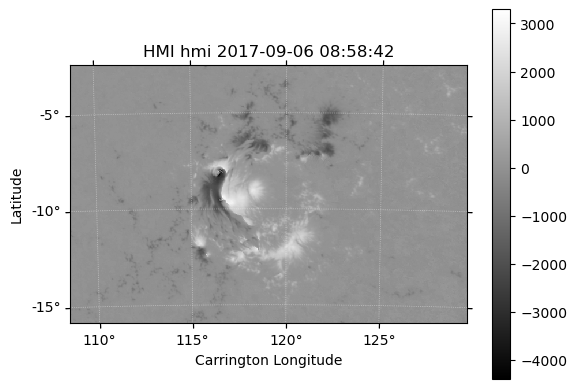

In [ ]:
r_map.peek()

In [ ]:
ref_wcs = r_map.wcs
ref_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'CRLN-CEA'  'CRLT-CEA'  
CRVAL : 119.078156  -9.24354935  
CRPIX : 344.5  224.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 0.0299999993  0.0299999993  
NAXIS : 688  448

## AIA 171

In [ ]:
aia171 = glob.glob(os.path.join(aia171_dir, '*0900*'))[0]
aia171

'NOAA_12673/aia171/aia.lev1_euv_12s.2017-09-06T090010Z.171.image_lev1.fits'

In [ ]:
def aia_draw(path, ref_wcs, wavelength):
    aia_map = Map(path)
    aia_map.peek()
    obstime = aia_map.observer_coordinate.obstime
    obstime.format = 'iso'
    aia_repro_map = aia_map.reproject_to(ref_wcs)

    fig = plt.figure()
    ax = fig.add_subplot(projection=aia_repro_map)
    aia_repro_map.plot(axes=ax)
    plt.colorbar()
    plt.title(f"AIA {wavelength} Å {obstime.value}")
    plt.show()

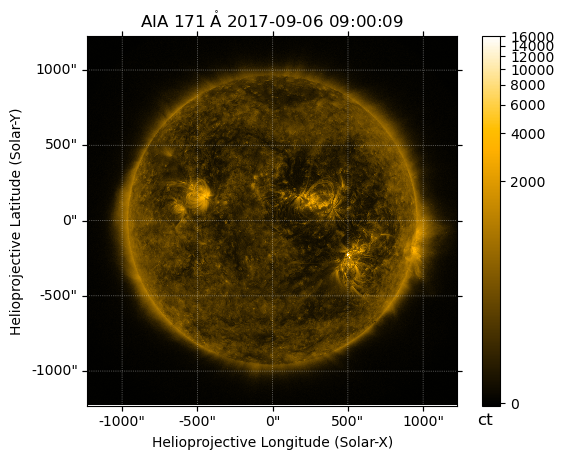

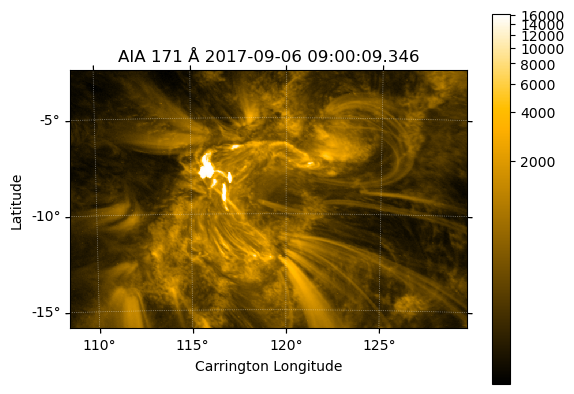

In [ ]:
aia_draw(aia171, ref_wcs, '171')

## AIA 94

In [ ]:
aia94_dir = '01_input/AR7115_20170906_090000/euv'

In [ ]:
aia94 = glob.glob(os.path.join(aia94_dir, '*0900*'))[0]
aia94

'01_input/AR7115_20170906_090000/euv/aia.lev1_euv_12s.2017-09-06T090001Z.94.image_lev1.fits'

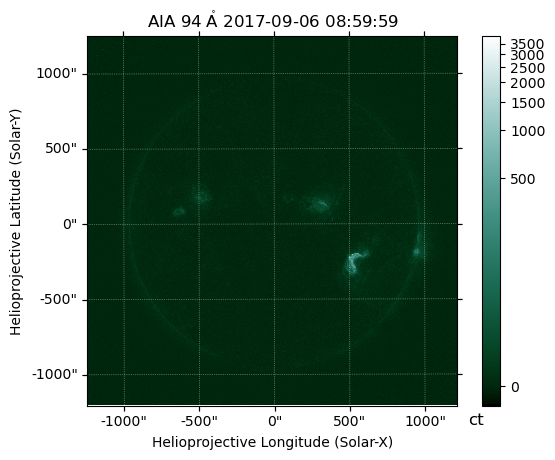

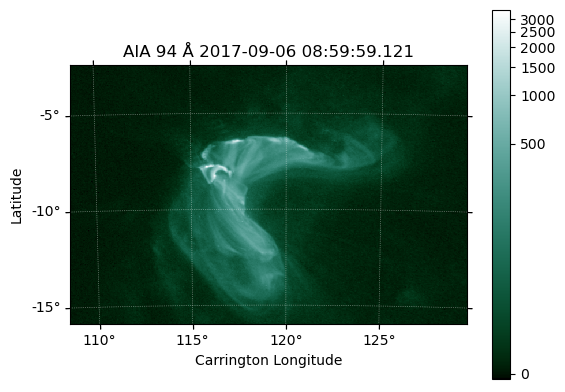

In [ ]:
aia_draw(aia94, ref_wcs, '94')